# MACD
参考URL : http://www.algo-fx-blog.com/macd-python-technical-indicators/

In [18]:
import time
import datetime

import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

## Scraping datasets from coin market cap

In [28]:
time.strftime("%Y%m%d")

'20180805'

In [27]:
bitcoin = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20170101&end="+time.strftime("%Y%m%d"))[0] 
bitcoin = bitcoin.assign(Date=pd.to_datetime(bitcoin['Date'])) 
bitcoin['Volume'] = bitcoin['Volume'].astype('int64') 
bitcoin.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-08-04,7438.67,7497.49,6984.07,7032.85,4268390000,127859350021
1,2018-08-03,7562.14,7562.14,7328.65,7434.39,4627150000,129965898111
2,2018-08-02,7634.19,7712.77,7523.44,7567.15,4214110000,131189721712
3,2018-08-01,7769.04,7769.04,7504.95,7624.91,4797620000,133492645169
4,2018-07-31,8181.20,8181.53,7696.93,7780.44,5287530000,140559547538


## Calculate MACD

In [7]:
macd = pd.DataFrame()
macd['date'] = bitcoin['Date']
macd['close'] = bitcoin['Close**']
macd['ema_12'] = bitcoin['Close**'].ewm(span=12).mean()
macd['ema_26'] = bitcoin['Close**'].ewm(span=26).mean()
macd['macd'] = macd['ema_12'] - macd['ema_26']
macd['signal'] = macd['macd'].ewm(span=9).mean()
macd.head()

,date,close,ema_12,ema_26,macd,signal
0,2018-08-04,7032.85,7032.850000,7032.850000,0.000000,0.000000
1,2018-08-03,7434.39,7250.350833,7241.341923,9.008910,5.004950
2,2018-08-02,7567.15,7373.997621,7358.401602,15.596019,9.345552
3,2018-08-01,7624.91,7453.200853,7432.905704,20.295150,13.054766
4,2018-07-31,7780.44,7542.110560,7513.500340,28.610220,17.682161


## Plot bitcoin close valud and MACD

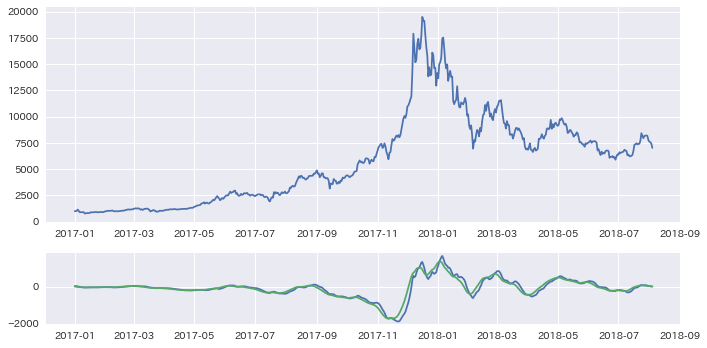

In [26]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]}, figsize=(10, 5))
ax1.plot(macd['date'].astype(datetime.datetime), macd['close'])
ax1.grid(True)

ax2.plot(macd['date'].astype(datetime.datetime), macd['macd'])
ax2.plot(macd['date'].astype(datetime.datetime), macd['signal'])
ax2.grid(True)
 
fig.tight_layout()
plt.show()